## Correlational Analysis
Load the data

In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

file_path = 'external_data/FNSPID/top50_processed/'
files = os.listdir(file_path)

df = pd.read_csv(file_path + files[0])
df

,date,open,high,low,close,adj close,volume,ABER_ZG_5_15,ABER_SG_5_15,ABER_XG_5_15,...,TSVs_18_10,TSVr_18_10,WCP,WILLR_14,WMA_10,ZIGZAGs_5.0%_10,ZIGZAGv_5.0%_10,ZIGZAGd_5.0%_10,ZL_EMA_10,ZS_30
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.406782,117258400,NaN,NaN,NaN,...,NaN,NaN,0.513951,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.385558,43971200,NaN,NaN,NaN,...,NaN,NaN,0.487165,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.357260,26432000,NaN,NaN,NaN,...,NaN,NaN,0.451451,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366103,21610400,NaN,NaN,NaN,...,NaN,NaN,0.462612,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.376715,18362400,0.478423,NaN,NaN,...,NaN,NaN,0.476004,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10847,2023-12-21,196.100006,197.080002,193.500000,194.679993,194.679993,46482500,196.150666,198.974706,193.326626,...,4.457842e+08,0.686016,194.984997,-40.591645,196.018728,NaN,NaN,NaN,195.478301,0.772041
10848,2023-12-22,195.179993,195.410004,192.970001,193.600006,193.600006,37122800,195.418000,198.216438,192.619563,...,4.003407e+08,0.605208,193.895004,-63.771054,195.590002,NaN,NaN,NaN,194.720430,0.438912
10849,2023-12-26,193.610001,193.889999,192.830002,193.050003,193.050003,28919300,194.942000,197.624542,192.259459,...,3.890246e+08,0.695813,193.205002,-80.121884,195.099638,NaN,NaN,NaN,193.709444,0.224904
10850,2023-12-27,192.490005,193.500000,191.089996,193.149994,193.149994,48087700,194.139333,196.803705,191.474961,...,3.703625e+08,0.667443,192.722496,-75.849967,194.629818,NaN,NaN,NaN,193.302270,0.188261


Testing the function

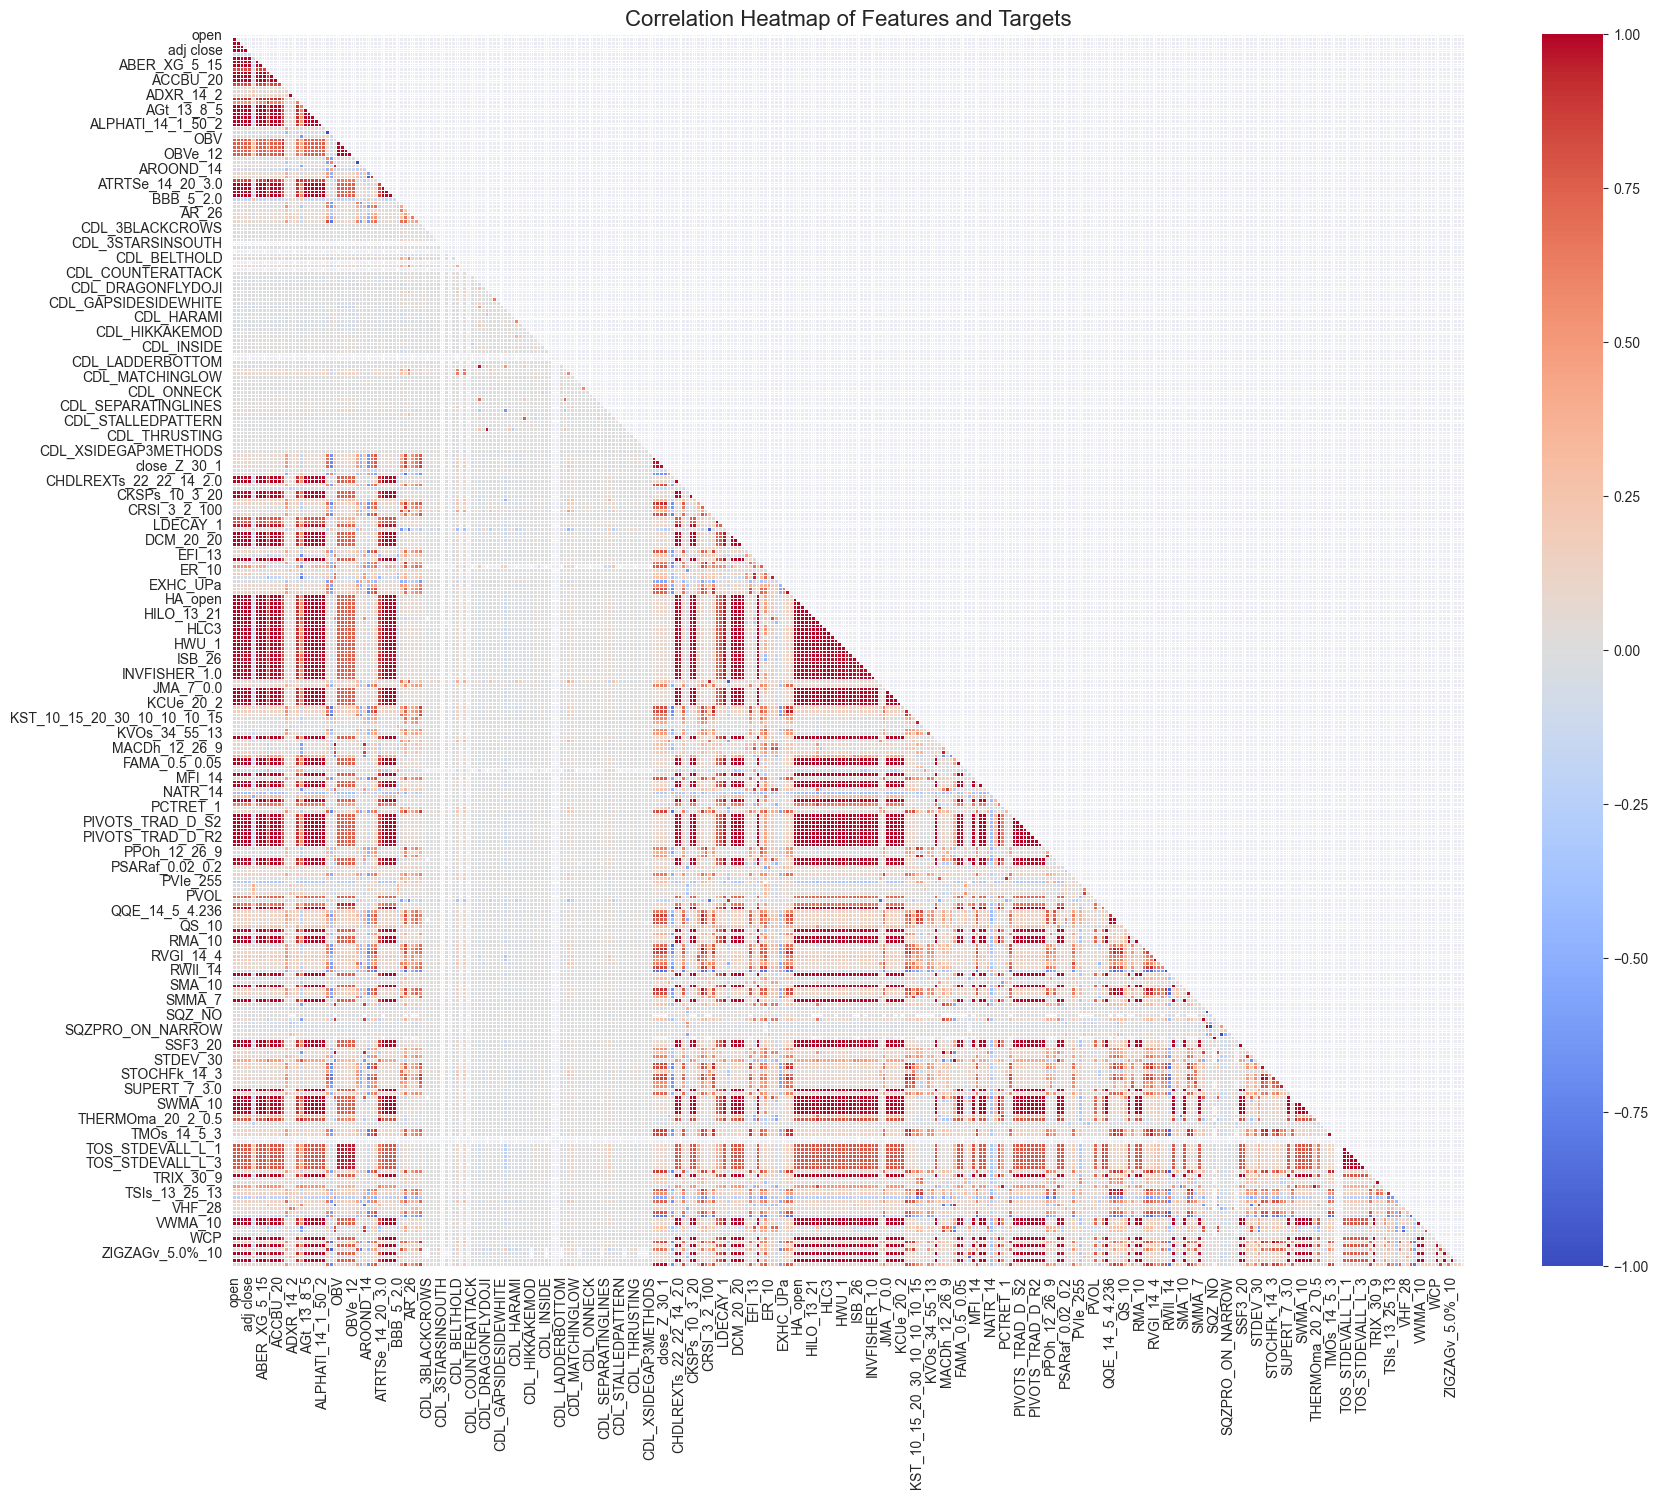

In [13]:
data = df.drop(columns=['date'])

corr_matrix = data.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)
plt.title('Correlation Heatmap of Features and Targets', fontsize=16)

plt.show()

Align all CSV files to the same columns

In [27]:
from tqdm import tqdm
from functools import reduce

col_list = []
for csv in tqdm(files):
    col_list.append(pd.read_csv(file_path + csv).columns)
    
common_columns = list(reduce(lambda x, y: set(x) & set(y), col_list))
common_columns.sort()

for csv in tqdm(files):
    df = pd.read_csv(file_path + csv)
    df = df[common_columns]
    df.to_csv(file_path + 'aligned/' + csv, index=False)

100%|██████████| 50/50 [03:00<00:00,  3.61s/it]


Run the average correlation table

In [15]:
from tqdm import tqdm

corr_matrices = []

for csv in tqdm(files):
    if csv == 'aligned':
        continue
    df = pd.read_csv(file_path + 'aligned/' + csv)
    
    # Reshuffle dataframe
    columns_to_move = ['open', 'high', 'low', 'close', 'volume', 'adj close']
    new_column_order = columns_to_move + [col for col in df.columns if col not in columns_to_move]
    df = df[new_column_order]
    
    corr_matrices.append(df.drop(columns=['date']).corr())

avg_corr_matrix = np.mean(corr_matrices, axis=0)

mask = np.triu(np.ones_like(avg_corr_matrix, dtype=bool))

100%|██████████| 51/51 [02:01<00:00,  2.39s/it]


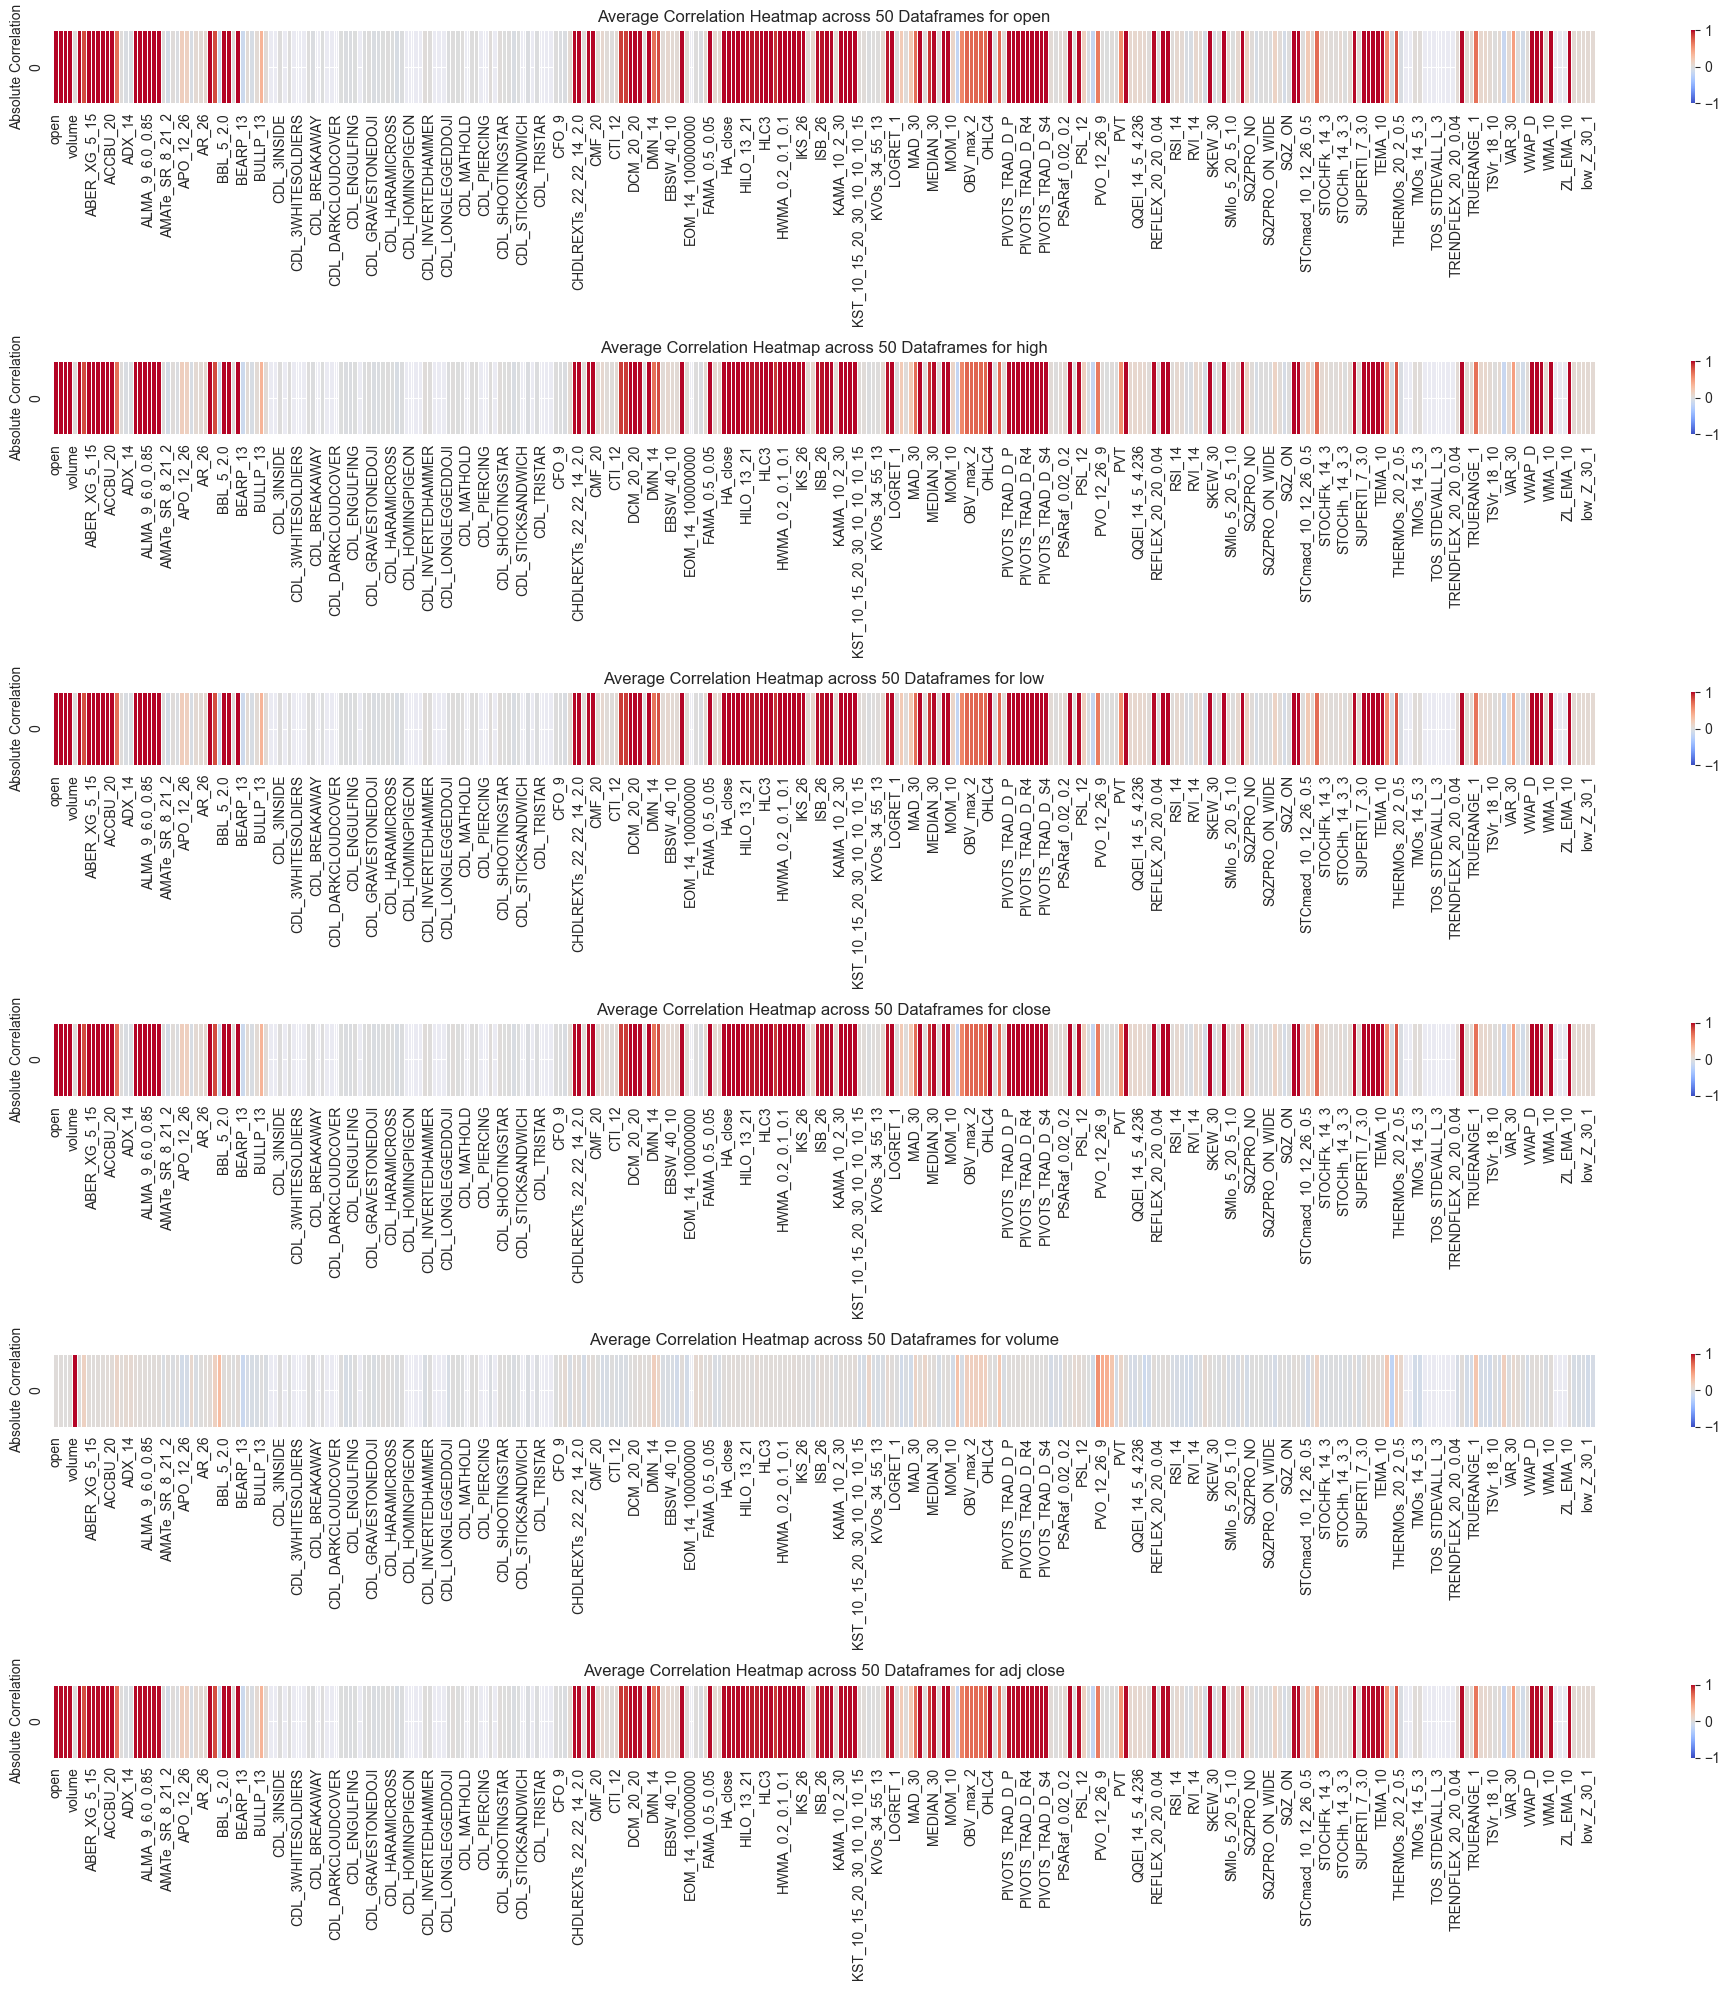

In [24]:
fig, axes = plt.subplots(6, 1, figsize=(20, 20))
for i, target in enumerate(avg_corr_matrix[:6]):
    sns.heatmap(pd.DataFrame([target], columns=corr_matrices[0].columns), cmap='coolwarm', vmin=-1, vmax=1, center=0, linewidths=.5, ax=axes[i])
    axes[i].set_title(f'Average Correlation Heatmap across 50 Dataframes for {corr_matrices[0].columns[i]}')
    axes[i].set_ylabel('Absolute Correlation')
    axes[i].set_yticks([])

plt.tight_layout()
plt.show()

In [66]:
avg_corr_df = pd.DataFrame(avg_corr_matrix)
avg_corr_df.to_csv('average_correlation_matrix_spearman.csv')

print(f"Number of features in the final correlation matrix: {avg_corr_matrix.shape[0]}")

Number of features in the final correlation matrix: 330


Try to calculate features we should keep based on a threshold. However, this immediate correlation is not so beneficial since all TA indicators were derived from the original OHLCVA data.

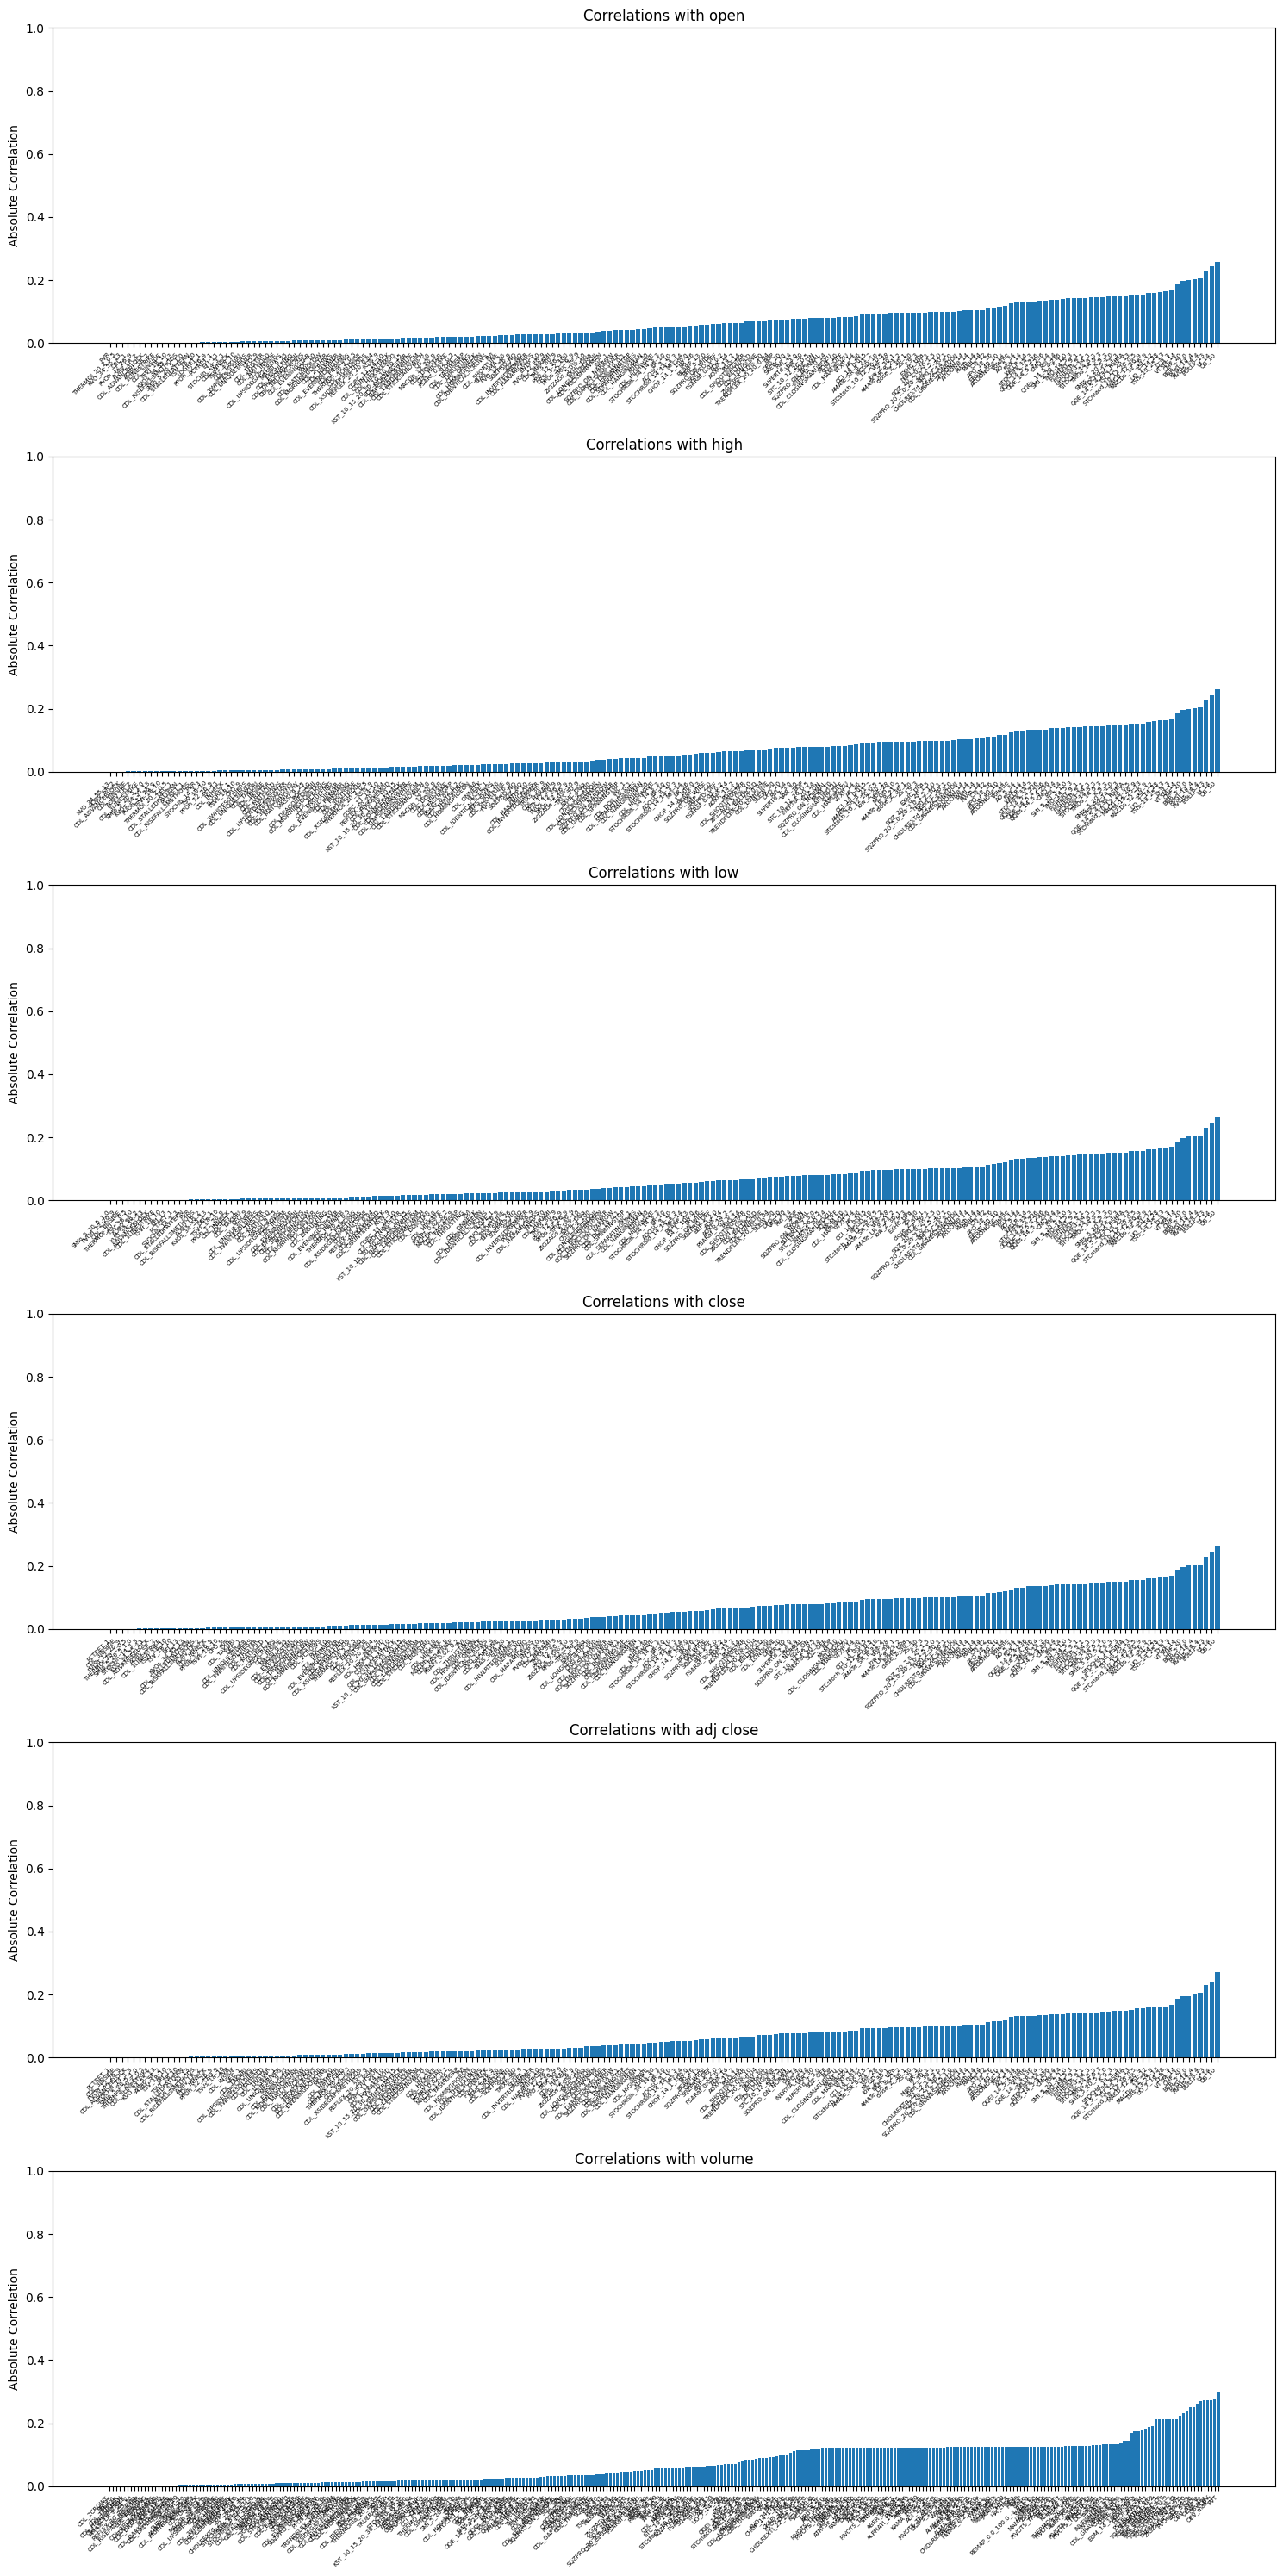

In [72]:
threshold = 0.3
num_targets = 6
option = 'lowest'
# option = 'highest'

target_corr = corr_matrix.iloc[:, :num_targets]
# print(target_corr.columns)

fig, axes = plt.subplots(num_targets, 1, figsize=(15, 3 * num_targets))

for i, target in enumerate(target_corr):
    if option == 'lowest':
        significant_correlations = target_corr[target][target_corr[target].abs() < threshold]
        sorted_correlations = significant_correlations.abs().sort_values(ascending=True)
    else:
        significant_correlations = target_corr[target][target_corr[target].abs() > threshold]
        sorted_correlations = significant_correlations.abs().sort_values(ascending=False)
    
    if len(sorted_correlations) > 0:
        axes[i].bar(range(len(sorted_correlations)), sorted_correlations.values, align='center')
        axes[i].set_title(f'Correlations with {target}')
        axes[i].set_ylabel('Absolute Correlation')
        axes[i].set_ylim(0, 1)

        # Set x-ticks and labels
        axes[i].set_xticks(range(len(sorted_correlations)))
        axes[i].set_xticklabels(sorted_correlations.index, rotation=90, ha='right', fontsize=5)

        # Adjust layout to prevent overlapping
        plt.setp(axes[i].xaxis.get_majorticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()
fig.savefig(f'candlestick_ta_correlation_{option}.png', bbox_inches='tight', dpi=300)

## Time-based correlational analysis
We need to perform time-based correlational analysis as well. Split the timeseries by years and check which is more valuable in each particular year. 
## TODO

## Lag-based relational analysis

In [26]:
import matplotlib.pyplot as plt

time_lags = [-90, -60, -30, -21, -14, -7, -5, -3, -2, -1, 0, 1, 2, 3, 5, 7, 14, 21, 30, 60, 90]

def calculate_lag_correlation(series1, series2, lag_, corr_type='pearson'):
    if lag_ > 0:
        return series1.corr(series2.shift(lag_), method=corr_type)
    elif lag_ < 0:
        return series1.shift(-lag_).corr(series2, method=corr_type)
    else:
        return series1.corr(series2, method=corr_type)

def plot_lag_correlation(avg_corr_, var1, var2, lags, fig_, axes_, subplot):
    is_neg_corr = False
    
    # if the mean of the corr list is negative, flip signs and plot a different colour
    if avg_corr_.mean() < 0:
        avg_corr_ = -avg_corr_
        is_neg_corr = True
    
    # if the max corr point is on the left or center, don't plot
    if avg_corr_.argmax() <= len(lags) / 2 + 1:
        return False
    
    if is_neg_corr:
        axes_[subplot].plot(lags, avg_corr_, color='orange')
    else:
        axes_[subplot].plot(lags, avg_corr_, color='blue')
    axes_[subplot].axvline(x=0, color='r', linestyle='--')
    axes_[subplot].set_title(f'{var2}')
    # axes_[subplot].set_xlabel('Time Lag')
    # axes_[subplot].set_ylabel('Correlation')
    axes_[subplot].set_ylim(0, 1)
    axes_[subplot].set_xticks([])
    axes_[subplot].set_yticks([])
    
    return True

In [ ]:
fig, axes = plt.subplots(34, 10, figsize=(20, 4 * 10))
axes = axes.flatten()
# fig.suptitle(f'Lagged Feature Correlations', fontsize=16)

counter = 0

for col in df.columns:
    if col == 'date':
        continue
        
    all_corr = []
    
    for file in files:
        if file == 'aligned':
            continue
            
        df = pd.read_csv(file_path + file)
        df.drop(columns=['date'], inplace=True)
        
        correlations = []
        # calculate and append correlation for each lag point
        for idx, lag in enumerate(time_lags):
            correlation = calculate_lag_correlation(df['volume'], df[col], lag, corr_type='pearson')
            # correlation = calculate_lag_correlation(df['volume'], df[col], lag, corr_type='spearman')
            # correlation = calculate_lag_correlation(df['volume'], df[col], lag, corr_type='kendall')
            correlations.append(correlation)
            
        all_corr.append(correlations)
    
    avg_corr = np.mean(all_corr, axis=0)
    
    has_plot = plot_lag_correlation(avg_corr, 'volume', col, time_lags, fig, axes, counter)
    
    if has_plot:
        counter += 1

plt.tight_layout()
plt.show()